In [3]:
import json
import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np
from matplotlib.colors import LogNorm
import pandas as pd
import matplotlib.path as mplPath
import matplotlib.patches as patches

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 20)


In [56]:
with open('data.dat.bak') as f:
    l = json.load(f)
    data = []
    for one in l:
        runID, fileID, eventID, d = one['runID'], one['fileID'], one['eventID'], one['data']
        entry = {'runID': runID, 'fileID': fileID, 'eventID': one['eventID'],
               'theta1':d[0][0][0],'L1':d[0][0][1],
               'theta2':d[0][1][0],'L2':d[0][1][1],'Range':d[1]}
        
        data.append(entry)

In [57]:
container = {}
names = data[0].keys()
for _ in names: container[_] = []

for d in data:
    for n in names:
        container[n].append(d[n])
df = pd.DataFrame(container)

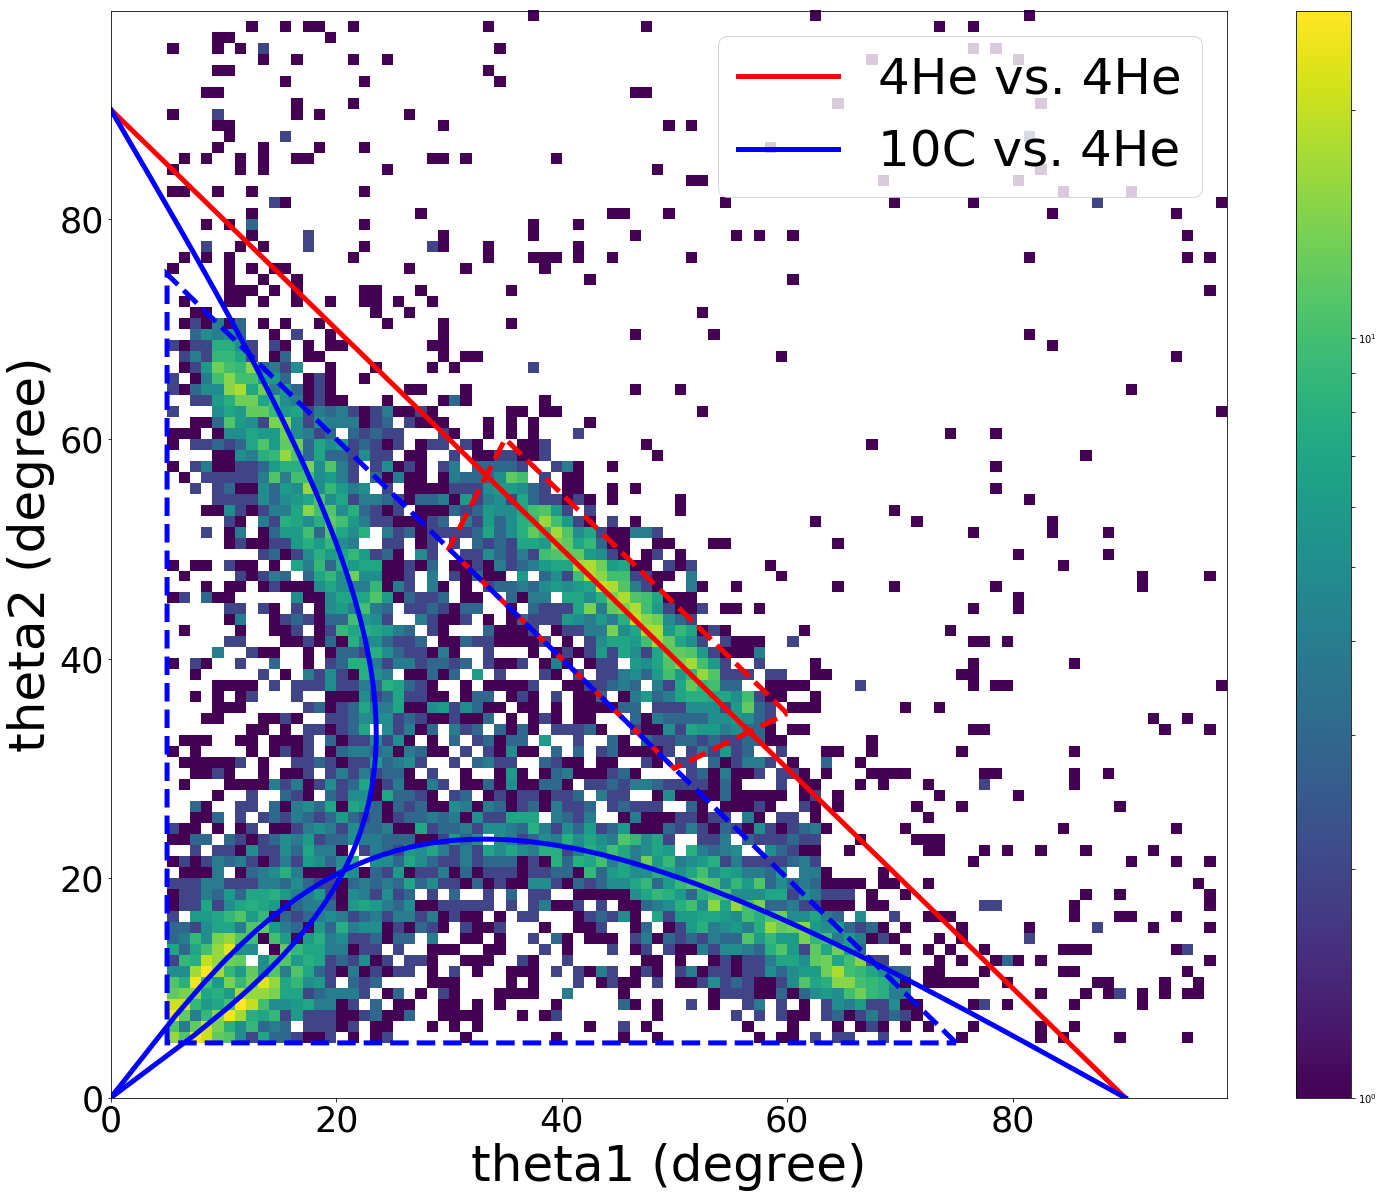

In [101]:
fig = plt.figure(figsize=(25,20))


poly = [[55,77],[50,65],[65,50],[77,55],[55,77]]
path1 = mplPath.Path(poly)
patch1 = patches.PathPatch(path1, facecolor=(0,0,0,0),EdgeColor='r', lw=2)

poly = [[68,45],[85,15],[70,15],[60,35],[68,45]]
path1 = mplPath.Path(poly)
patch1 = patches.PathPatch(path1, facecolor=(0,0,0,0),EdgeColor='r', lw=2)

poly = [[75,5],[5,75],[5,5],[75,5]]
path1 = mplPath.Path(poly)
patch1 = patches.PathPatch(path1, facecolor=(0,0,0,0),EdgeColor='b', lw=5,linestyle='--')

poly = [[60,35],[35,60],[30,50],[50,30],[60,35]]
path2 = mplPath.Path(poly)
patch2 = patches.PathPatch(path2, facecolor=(0,0,0,0),EdgeColor='r', lw=5,linestyle='--')

mask = ((df['Range']>2) & df['L1'].between(4,10000) & df['L2'].between(4,10000) 
& df['theta1'].between(5,160) & df['theta2'].between(5,160))
    
df_tmp = df[mask]

x,y = np.sort(df_tmp[['theta1','theta2']],axis=1).T
#print np.concatenate([x,y])
plt.hist2d(np.concatenate([x,y]),np.concatenate([y,x]),
           bins=[np.arange(0,100,1),np.arange(0,100,1)],
           norm=LogNorm());
plt.colorbar()
plt.gca().add_patch(patch2)
plt.gca().add_patch(patch1)

plt.tick_params(axis='both', which='major', labelsize=35)

#plt.axis('off')
#fig.delaxes(fig.axes[1]) 

plt.plot([0,90],[90,0],c='r',label='4He vs. 4He',linewidth=5)

t1,t2 =[], []
with open("Tables/ScatterTable/10C_4He_EL.dat") as f:
    for line in f.readlines():
        theta1,theta2 = map(float,line.split())
        t1.append(theta1)
        t2.append(theta2)
plt.plot(t1,t2,c='b',linewidth=5)
plt.plot(t2,t1,c='b',label='10C vs. 4He',linewidth=5)

t1,t2 =[], []
with open("Tables/ScatterTable/10C_16O_EL.dat") as f:
    for line in f.readlines():
        theta1,theta2 = map(float,line.split())
        t1.append(theta1)
        t2.append(theta2)
#plt.plot(t1,t2,c='g',linewidth=5)
#plt.plot(t2,t1,c='g',label='10C vs. 16O',linewidth=5)

t1,t2 =[], []
with open("Tables/ScatterTable/7Be_4He_EL.dat") as f:
    for line in f.readlines():
        theta1,theta2 = map(float,line.split())
        t1.append(theta1)
        t2.append(theta2)
#plt.plot(t1,t2,c='y',linewidth=5)
#plt.plot(t2,t1,c='y',label='7Be vs. 4He',linewidth=5)


t1,t2 =[], []
with open("Tables/ScatterTable/10C_12C_EL.dat") as f:
    for line in f.readlines():
        theta1,theta2 = map(float,line.split())
        t1.append(theta1)
        t2.append(theta2)
#plt.plot(t1,t2,c='b',linewidth=5)
#plt.plot(t2,t1,c='b',label='10C vs. 12C',linewidth=5)
#plt.xlim(-1,160)
#plt.ylim(-1,160)

plt.legend(loc=1,prop={'size': 50})
plt.xlabel('theta1 (degree)',fontsize=50)
plt.ylabel('theta2 (degree)',fontsize=50)

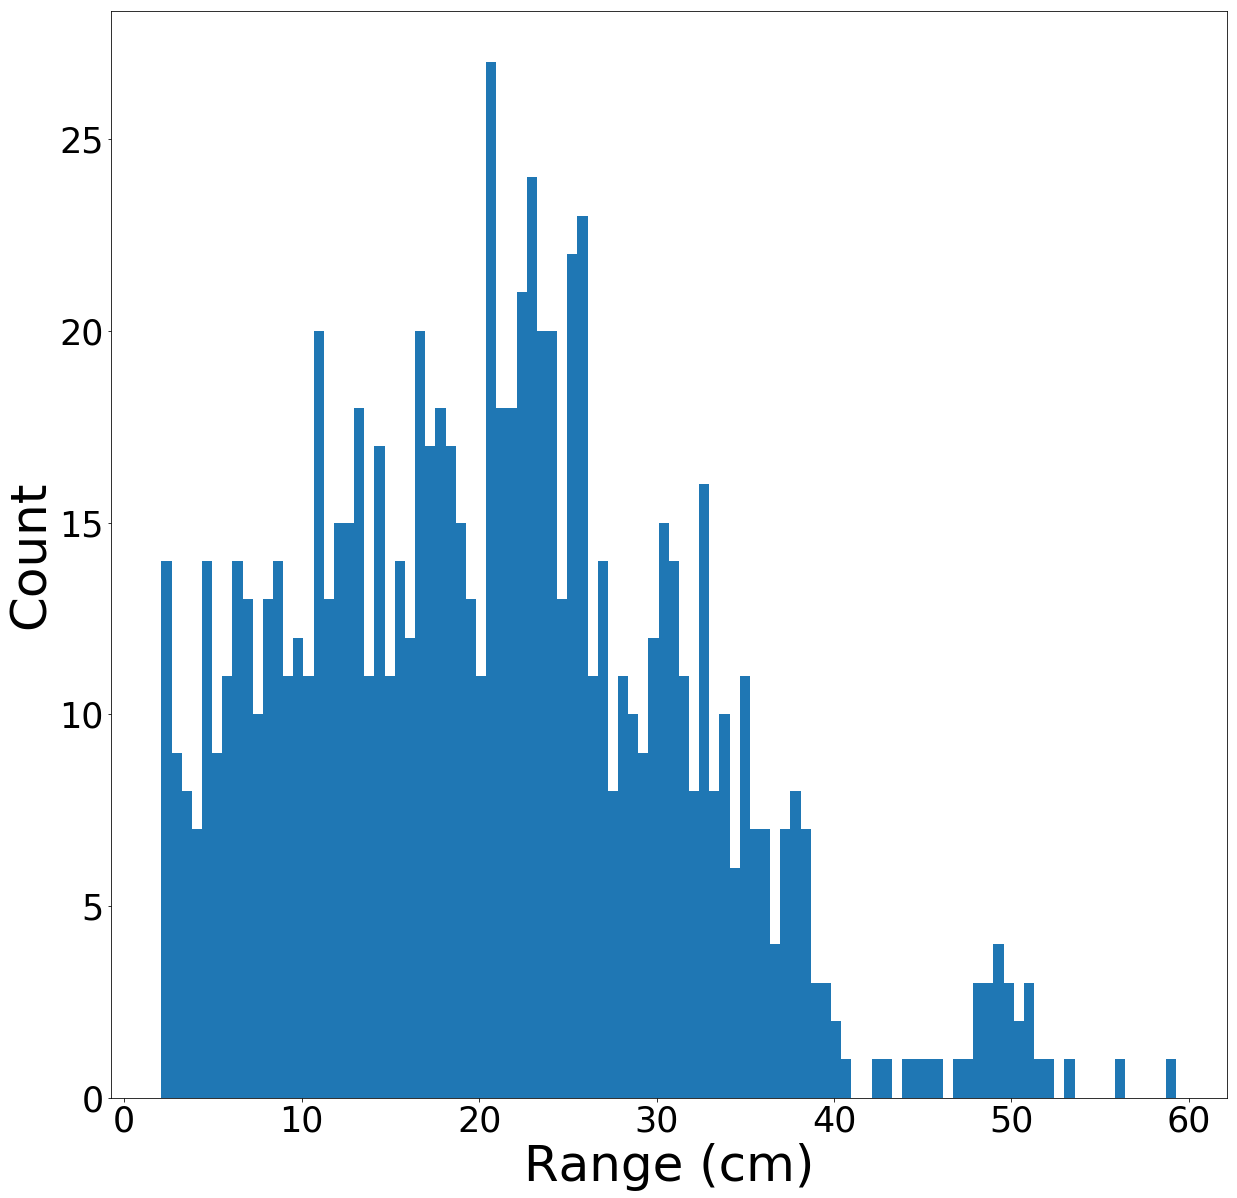

In [121]:


x,y,R = df[mask][['theta1','theta2','Range']].T.values
mask2 = path2.contains_points(np.stack([x,y]).T) | path2.contains_points(np.stack([y,x]).T)
#x,y,R = df[mask][['theta1','theta2','Range']].T.values
#mask2 = path2.contains_points(np.stack([x,y]).T) | path2.contains_points(np.stack([y,x]).T)
#plt.hist(R,bins=100);
mask1 = path1.contains_points(np.stack([x,y]).T) | path1.contains_points(np.stack([y,x]).T)
plt.hist(R[mask2],bins=100);
plt.tick_params(axis='both', which='major', labelsize=35)
plt.xlabel('Range (cm)',fontsize=50)
plt.ylabel('Count',fontsize=50)

In [117]:
df_tmp = df[mask][mask1]
df_tmp[(df_tmp['Range']<100)&(df_tmp['runID']==88)&(df_tmp['fileID']==10)]


,L1,L2,Range,eventID,fileID,runID,theta1,theta2
28282,7.668266,22.597975,5.726511,3,10,88,22.786079,26.349882
28320,10.135051,7.004992,29.847523,54,10,88,51.212365,15.737778
28325,8.563991,17.948831,14.669918,60,10,88,63.462706,11.369264
28337,10.222329,18.422191,7.715280,76,10,88,67.508833,7.345118
28351,5.547232,25.026260,7.984207,95,10,88,13.553375,9.661309
28359,5.874733,18.338657,17.892808,108,10,88,33.004548,30.835731
28362,4.381365,22.967049,8.555079,111,10,88,64.620595,11.150395
28367,5.452202,22.587878,13.866628,121,10,88,6.492399,11.448786
28385,4.747051,27.782687,2.422945,150,10,88,71.433887,8.486358
28392,8.603972,13.464021,13.747174,160,10,88,23.462535,45.324902
